<a href="https://colab.research.google.com/github/booorayan/Regression_fifa/blob/master/Football_Match_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Football Match Outcomes Using Regression Models 

## 1. Defining the Question

### a) Specifying the Question

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Importing Required Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings('ignore')


## 3. Reading the Data

In [4]:
# Loading the Dataset
# 
#
ranking = pd.read_csv('fifa_ranking.csv')
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [0]:
ran_copy = ranking.copy()
res_copy = results.copy()

## 4. Exploring/Checking the Data

In [9]:
# Determining the no. of records in our dataset
#
ranking.shape

(57793, 16)

In [10]:
results.shape

(40839, 9)

In [11]:
# Previewing the top of our dataset
#

ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [12]:
# Previewing the bottom of our dataset
# 
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [0]:
# Checking whether each column has an appropriate datatype
#

## 5. Tidying the Dataset

In [14]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [15]:
ranking = ranking.drop(ranking.iloc[:,2:15], 1)
ranking.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [16]:
ranking.tail()

,rank,country_full,rank_date
57788,206,Anguilla,2018-06-07
57789,206,Bahamas,2018-06-07
57790,206,Eritrea,2018-06-07
57791,206,Somalia,2018-06-07
57792,206,Tonga,2018-06-07


In [17]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [18]:
results = results.drop('city', 1)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [19]:
res_fil = results[results.neutral == False]
res_fil.tail()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
40803,2019-07-08,Samoa,Papua New Guinea,0,6,Pacific Games,Samoa,False
40817,2019-07-12,Samoa,Tonga,2,0,Pacific Games,Samoa,False
40821,2019-07-13,India,North Korea,2,5,Intercontinental Cup,India,False
40829,2019-07-16,India,Syria,1,1,Intercontinental Cup,India,False
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Samoa,False


In [20]:
res_fil.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'UEFA Euro qualification', 'UEFA Euro',
       'Merdeka Tournament', 'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Copa Juan Pinto Durán', 'UAFA Cup',
       'CONCACAF Championship', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Co

In [21]:
# filtering by tournament 
tourna = ['Friendly', 'FIFA World Cup', 'Copa América', 'UEFA Euro']
res_f = res_fil
res_f.head()


,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [22]:
res_f.tail()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
40803,2019-07-08,Samoa,Papua New Guinea,0,6,Pacific Games,Samoa,False
40817,2019-07-12,Samoa,Tonga,2,0,Pacific Games,Samoa,False
40821,2019-07-13,India,North Korea,2,5,Intercontinental Cup,India,False
40829,2019-07-16,India,Syria,1,1,Intercontinental Cup,India,False
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Samoa,False


In [23]:

res_f['year'] = pd.DatetimeIndex(res_f['date']).year
res_f['month'] = pd.DatetimeIndex(res_f['date']).month
res_f['day'] = pd.DatetimeIndex(res_f['date']).day

res_f.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,day
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,1876,3,4


In [24]:
r_f = res_f[res_f['year'].between(2006,2018, inclusive=True)]
r_f.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,day
28033,2006-01-02,Qatar,Libya,2,0,Friendly,Qatar,False,2006,1,2
28034,2006-01-05,Egypt,Zimbabwe,2,0,Friendly,Egypt,False,2006,1,5
28036,2006-01-09,Morocco,DR Congo,3,0,Friendly,Morocco,False,2006,1,9
28038,2006-01-12,Tunisia,Libya,1,0,Friendly,Tunisia,False,2006,1,12
28039,2006-01-14,Egypt,South Africa,1,2,Friendly,Egypt,False,2006,1,14


In [25]:
r_f.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
country       object
neutral         bool
year           int64
month          int64
day            int64
dtype: object

In [26]:
r_f.home_score.iloc[0]

2

In [27]:
status = []

for i in range(len(r_f['home_team'])):
  if r_f.home_score.iloc[i] > r_f.away_score.iloc[i]:
    status.append('Win')
  elif r_f['home_score'].iloc[i] < r_f.away_score.iloc[i]:
    status.append('Lose')
  else:
    status.append('Draw')
  
      
r_f['status'] = status
r_f.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

r_f.head(10)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month,day,status
28033,2006-01-02,Qatar,Libya,2,0,Friendly,Qatar,False,2006,1,2,Win
28034,2006-01-05,Egypt,Zimbabwe,2,0,Friendly,Egypt,False,2006,1,5,Win
28036,2006-01-09,Morocco,DR Congo,3,0,Friendly,Morocco,False,2006,1,9,Win
28038,2006-01-12,Tunisia,Libya,1,0,Friendly,Tunisia,False,2006,1,12,Win
28039,2006-01-14,Egypt,South Africa,1,2,Friendly,Egypt,False,2006,1,14,Lose
28040,2006-01-14,Morocco,Zimbabwe,1,0,Friendly,Morocco,False,2006,1,14,Win
28041,2006-01-14,Senegal,DR Congo,0,0,Friendly,Senegal,False,2006,1,14,Draw
28042,2006-01-15,Tunisia,Ghana,2,0,Friendly,Tunisia,False,2006,1,15,Win
28044,2006-01-17,Morocco,Angola,2,2,Friendly,Morocco,False,2006,1,17,Draw
28045,2006-01-18,Saudi Arabia,Sweden,1,1,Friendly,Saudi Arabia,False,2006,1,18,Draw


In [0]:
# res_f = res_f[res_f['year'] == 2018]
# res_f.head()

# fil_res = res_f[~(res_f['month'] > 6)]
# fil_res.head()

In [0]:
# res_f.head()

In [30]:
res_fi = r_f.drop(['date','neutral'], 1)
res_fi.tail()

,home_team,away_team,home_score,away_score,tournament,country,year,month,day,status
40338,Bahrain,Lebanon,1,0,Friendly,Bahrain,2018,12,27,Win
40340,Qatar,Algeria,0,1,Friendly,Qatar,2018,12,27,Lose
40343,United Arab Emirates,Kuwait,0,2,Friendly,United Arab Emirates,2018,12,28,Lose
40344,Bahrain,North Korea,4,0,Friendly,Bahrain,2018,12,29,Win
40350,Qatar,Iran,1,2,Friendly,Qatar,2018,12,31,Lose


In [31]:
re = res_fi[~((res_fi['year'] == 2018) & (res_fi['month'] > 6))]
re.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month,day,status
28033,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win
28034,Egypt,Zimbabwe,2,0,Friendly,Egypt,2006,1,5,Win
28036,Morocco,DR Congo,3,0,Friendly,Morocco,2006,1,9,Win
28038,Tunisia,Libya,1,0,Friendly,Tunisia,2006,1,12,Win
28039,Egypt,South Africa,1,2,Friendly,Egypt,2006,1,14,Lose


In [32]:
re.shape

(8403, 10)

In [33]:
ranking['year'] = pd.DatetimeIndex(ranking['rank_date']).year
ranking['month'] = pd.DatetimeIndex(ranking['rank_date']).month
ranking['day'] = pd.DatetimeIndex(ranking['rank_date']).day

ranking.head()

,rank,country_full,rank_date,year,month,day
0,1,Germany,1993-08-08,1993,8,8
1,2,Italy,1993-08-08,1993,8,8
2,3,Switzerland,1993-08-08,1993,8,8
3,4,Sweden,1993-08-08,1993,8,8
4,5,Argentina,1993-08-08,1993,8,8


In [34]:
rank_f = ranking[ranking['year'].between(2006,2018,inclusive=True)]
rank_f.head()

,rank,country_full,rank_date,year,month,day
26938,1,Brazil,2006-01-18,2006,1,18
26939,2,Czech Republic,2006-01-18,2006,1,18
26940,3,Netherlands,2006-01-18,2006,1,18
26941,4,Argentina,2006-01-18,2006,1,18
26942,5,Spain,2006-01-18,2006,1,18


In [35]:
rank_f.tail()

,rank,country_full,rank_date,year,month,day
57788,206,Anguilla,2018-06-07,2018,6,7
57789,206,Bahamas,2018-06-07,2018,6,7
57790,206,Eritrea,2018-06-07,2018,6,7
57791,206,Somalia,2018-06-07,2018,6,7
57792,206,Tonga,2018-06-07,2018,6,7


In [36]:
ran_f = rank_f.drop('rank_date', 1)
ran_f.tail()

,rank,country_full,year,month,day
57788,206,Anguilla,2018,6,7
57789,206,Bahamas,2018,6,7
57790,206,Eritrea,2018,6,7
57791,206,Somalia,2018,6,7
57792,206,Tonga,2018,6,7


In [37]:
ran_f.shape

(30855, 5)

In [38]:
r_f.describe()

,home_score,away_score,year,month,day
count,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000
mean,1.621809,1.001595,2011.950775,7.371809,14.091727
std,1.565140,1.186053,3.673432,3.109471,8.346957
min,0.000000,0.000000,2006.000000,1.000000,1.000000
25%,0.000000,0.000000,2009.000000,5.000000,7.000000
50%,1.000000,1.000000,2012.000000,8.000000,12.000000
75%,2.000000,2.000000,2015.000000,10.000000,21.000000
max,17.000000,13.000000,2018.000000,12.000000,31.000000


In [39]:
ran_f.describe()

,rank,year,month,day
count,30855.000000,30855.000000,30855.00000,30855.000000
mean,104.448517,2011.837498,6.39987,12.843623
std,59.925802,3.604028,3.45617,6.902990
min,1.000000,2006.000000,1.00000,1.000000
25%,52.000000,2009.000000,3.00000,7.000000
50%,105.000000,2012.000000,6.00000,13.000000
75%,156.000000,2015.000000,9.00000,18.000000
max,209.000000,2018.000000,12.00000,31.000000


In [40]:
merged = pd.merge(re, ran_f, how='left', left_on=['month','year'], right_on=['month', 'year'])
merged.head(10)

,home_team,away_team,home_score,away_score,tournament,country,year,month,day_x,status,rank,country_full,day_y
0,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,1.0,Brazil,18.0
1,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,2.0,Czech Republic,18.0
2,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,3.0,Netherlands,18.0
3,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,4.0,Argentina,18.0
4,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,5.0,Spain,18.0
5,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,5.0,France,18.0
6,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,7.0,Mexico,18.0
7,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,7.0,USA,18.0
8,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,9.0,England,18.0
9,Qatar,Libya,2,0,Friendly,Qatar,2006,1,2,Win,10.0,Portugal,18.0


In [41]:
merged.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'year', 'month', 'day_x', 'status', 'rank', 'country_full',
       'day_y'],
      dtype='object')

In [42]:
merged.drop(['day_x', 'day_y'], 1, inplace=True)
merged.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,rank,country_full
0,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,1.0,Brazil
1,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,2.0,Czech Republic
2,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,3.0,Netherlands
3,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,4.0,Argentina
4,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,5.0,Spain


In [43]:
merg_home = merged[merged.home_team == merged.country_full]
merg_home.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,rank,country_full
88,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,89.0,Qatar
236,Egypt,Zimbabwe,2,0,Friendly,Egypt,2006,1,Win,32.0,Egypt
444,Morocco,DR Congo,3,0,Friendly,Morocco,2006,1,Win,35.0,Morocco
642,Tunisia,Libya,1,0,Friendly,Tunisia,2006,1,Win,28.0,Tunisia
851,Egypt,South Africa,1,2,Friendly,Egypt,2006,1,Lose,32.0,Egypt


In [44]:
merg_home = merg_home.rename(columns={'rank':'home_rank'})
merg_home.tail()

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,home_rank,country_full
1743074,Belgium,Costa Rica,4,1,Friendly,Belgium,2018,6,Win,3.0,Belgium
1743290,Poland,Lithuania,4,0,Friendly,Poland,2018,6,Win,8.0,Poland
1743563,Russia,Saudi Arabia,5,0,FIFA World Cup,Russia,2018,6,Win,70.0,Russia
1743774,Russia,Egypt,3,1,FIFA World Cup,Russia,2018,6,Win,70.0,Russia
1743985,Russia,Uruguay,0,3,FIFA World Cup,Russia,2018,6,Lose,70.0,Russia


In [45]:
merg_away = merged[merged.away_team == merged.country_full]
merg_away.head()

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,rank,country_full
80,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,80.0,Libya
257,Egypt,Zimbabwe,2,0,Friendly,Egypt,2006,1,Win,53.0,Zimbabwe
695,Tunisia,Libya,1,0,Friendly,Tunisia,2006,1,Win,80.0,Libya
868,Egypt,South Africa,1,2,Friendly,Egypt,2006,1,Lose,49.0,South Africa
1077,Morocco,Zimbabwe,1,0,Friendly,Morocco,2006,1,Win,53.0,Zimbabwe


In [46]:
merg_away = merg_away.rename({'rank': 'away_rank'}, axis=1)
merg_away.head(10)

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,away_rank,country_full
80,Qatar,Libya,2,0,Friendly,Qatar,2006,1,Win,80.0,Libya
257,Egypt,Zimbabwe,2,0,Friendly,Egypt,2006,1,Win,53.0,Zimbabwe
695,Tunisia,Libya,1,0,Friendly,Tunisia,2006,1,Win,80.0,Libya
868,Egypt,South Africa,1,2,Friendly,Egypt,2006,1,Lose,49.0,South Africa
1077,Morocco,Zimbabwe,1,0,Friendly,Morocco,2006,1,Win,53.0,Zimbabwe
1484,Tunisia,Ghana,2,0,Friendly,Tunisia,2006,1,Win,50.0,Ghana
1702,Morocco,Angola,2,2,Friendly,Morocco,2006,1,Draw,63.0,Angola
1858,Saudi Arabia,Sweden,1,1,Friendly,Saudi Arabia,2006,1,Draw,14.0,Sweden
2335,Egypt,Libya,3,0,African Cup of Nations,Egypt,2006,1,Win,80.0,Libya
2505,Saudi Arabia,Finland,1,1,Friendly,Saudi Arabia,2006,1,Draw,46.0,Finland


In [47]:
merg_away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7581 entries, 80 to 1743929
Data columns (total 11 columns):
home_team       7581 non-null object
away_team       7581 non-null object
home_score      7581 non-null int64
away_score      7581 non-null int64
tournament      7581 non-null object
country         7581 non-null object
year            7581 non-null int64
month           7581 non-null int64
status          7581 non-null object
away_rank       7581 non-null float64
country_full    7581 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 710.7+ KB


In [0]:
merg_away.drop('country', 1, inplace=True)

In [49]:
fin_com = pd.merge(merg_home, merg_away, how='left', left_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'month', 'status'], right_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'month', 'status'])
fin_com.tail(10)

,home_team,away_team,home_score,away_score,tournament,country,year,month,status,home_rank,country_full_x,away_rank,country_full_y
7687,Latvia,Azerbaijan,1,3,Friendly,Latvia,2018,6,Lose,129.0,Latvia,105.0,Azerbaijan
7688,Finland,Belarus,2,0,Friendly,Finland,2018,6,Win,63.0,Finland,78.0,Belarus
7689,France,United States,1,1,Friendly,France,2018,6,Draw,7.0,France,NaN,NaN
7690,Austria,Brazil,0,3,Friendly,Austria,2018,6,Lose,26.0,Austria,2.0,Brazil
7691,India,Kenya,2,0,Intercontinental Cup,India,2018,6,Win,97.0,India,112.0,Kenya
7692,Belgium,Costa Rica,4,1,Friendly,Belgium,2018,6,Win,3.0,Belgium,23.0,Costa Rica
7693,Poland,Lithuania,4,0,Friendly,Poland,2018,6,Win,8.0,Poland,126.0,Lithuania
7694,Russia,Saudi Arabia,5,0,FIFA World Cup,Russia,2018,6,Win,70.0,Russia,67.0,Saudi Arabia
7695,Russia,Egypt,3,1,FIFA World Cup,Russia,2018,6,Win,70.0,Russia,45.0,Egypt
7696,Russia,Uruguay,0,3,FIFA World Cup,Russia,2018,6,Lose,70.0,Russia,14.0,Uruguay


In [50]:
fin_com.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'country', 'year', 'month', 'status', 'home_rank', 'country_full_x',
       'away_rank', 'country_full_y'],
      dtype='object')

In [51]:
fin_com.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 7696
Data columns (total 13 columns):
home_team         7697 non-null object
away_team         7697 non-null object
home_score        7697 non-null int64
away_score        7697 non-null int64
tournament        7697 non-null object
country           7697 non-null object
year              7697 non-null int64
month             7697 non-null int64
status            7697 non-null object
home_rank         7697 non-null float64
country_full_x    7697 non-null object
away_rank         7066 non-null float64
country_full_y    7066 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 841.9+ KB


In [52]:
fin_com = fin_com.drop(['country_full_x', 'country_full_y', 'country'], 1)
fin_com.head(10)

,home_team,away_team,home_score,away_score,tournament,year,month,status,home_rank,away_rank
0,Qatar,Libya,2,0,Friendly,2006,1,Win,89.0,80.0
1,Egypt,Zimbabwe,2,0,Friendly,2006,1,Win,32.0,53.0
2,Morocco,DR Congo,3,0,Friendly,2006,1,Win,35.0,NaN
3,Tunisia,Libya,1,0,Friendly,2006,1,Win,28.0,80.0
4,Egypt,South Africa,1,2,Friendly,2006,1,Lose,32.0,49.0
5,Morocco,Zimbabwe,1,0,Friendly,2006,1,Win,35.0,53.0
6,Senegal,DR Congo,0,0,Friendly,2006,1,Draw,30.0,NaN
7,Tunisia,Ghana,2,0,Friendly,2006,1,Win,28.0,50.0
8,Morocco,Angola,2,2,Friendly,2006,1,Draw,35.0,63.0
9,Saudi Arabia,Sweden,1,1,Friendly,2006,1,Draw,33.0,14.0


In [53]:
fin_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 7696
Data columns (total 10 columns):
home_team     7697 non-null object
away_team     7697 non-null object
home_score    7697 non-null int64
away_score    7697 non-null int64
tournament    7697 non-null object
year          7697 non-null int64
month         7697 non-null int64
status        7697 non-null object
home_rank     7697 non-null float64
away_rank     7066 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 661.5+ KB


In [54]:
fin_com.dropna(inplace=True)
fin_com.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
year          0
month         0
status        0
home_rank     0
away_rank     0
dtype: int64

In [55]:
fin_com.tail(10)

,home_team,away_team,home_score,away_score,tournament,year,month,status,home_rank,away_rank
7686,Estonia,Morocco,1,3,Friendly,2018,6,Lose,94.0,41.0
7687,Latvia,Azerbaijan,1,3,Friendly,2018,6,Lose,129.0,105.0
7688,Finland,Belarus,2,0,Friendly,2018,6,Win,63.0,78.0
7690,Austria,Brazil,0,3,Friendly,2018,6,Lose,26.0,2.0
7691,India,Kenya,2,0,Intercontinental Cup,2018,6,Win,97.0,112.0
7692,Belgium,Costa Rica,4,1,Friendly,2018,6,Win,3.0,23.0
7693,Poland,Lithuania,4,0,Friendly,2018,6,Win,8.0,126.0
7694,Russia,Saudi Arabia,5,0,FIFA World Cup,2018,6,Win,70.0,67.0
7695,Russia,Egypt,3,1,FIFA World Cup,2018,6,Win,70.0,45.0
7696,Russia,Uruguay,0,3,FIFA World Cup,2018,6,Lose,70.0,14.0


In [56]:
fin_com.tail()

,home_team,away_team,home_score,away_score,tournament,year,month,status,home_rank,away_rank
7692,Belgium,Costa Rica,4,1,Friendly,2018,6,Win,3.0,23.0
7693,Poland,Lithuania,4,0,Friendly,2018,6,Win,8.0,126.0
7694,Russia,Saudi Arabia,5,0,FIFA World Cup,2018,6,Win,70.0,67.0
7695,Russia,Egypt,3,1,FIFA World Cup,2018,6,Win,70.0,45.0
7696,Russia,Uruguay,0,3,FIFA World Cup,2018,6,Lose,70.0,14.0


In [0]:
# Checking for Anomalies
#

In [0]:
# Identifying the Missing Data
#

In [0]:
# Dealing with the Missing Data
#

In [0]:
# More data cleaning procedures
#

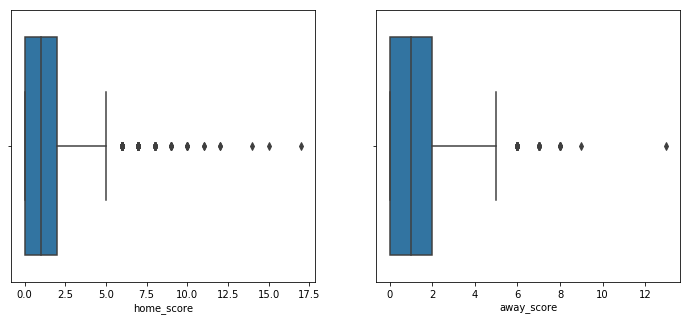

In [61]:
fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(fin_com.home_score, ax=ax1)
sns.boxplot(fin_com.away_score, ax=ax2)

plt.show()

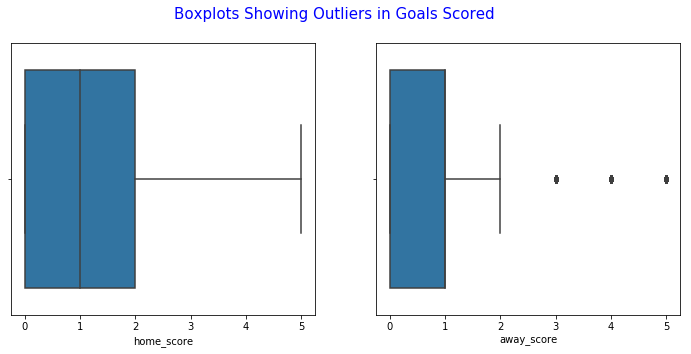

In [62]:
# removing outliers

Q1 = fin_com.quantile(0.25)
Q3 = fin_com.quantile(0.75)

IQR = Q3 - Q1

out_f = fin_com[~((fin_com < (Q1 - 1.5 * IQR)) | (fin_com > (Q3 + 1.5 * IQR)))]

fig,[ax1,ax2] = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(out_f.home_score, ax=ax1)
sns.boxplot(out_f.away_score, ax=ax2)
fig.suptitle('Boxplots Showing Outliers in Goals Scored', fontsize=15, color='b')

plt.show()

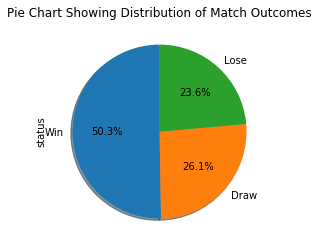

In [63]:
# pie chart to show distribution of outcomes

out_f.status.value_counts().plot(kind='pie', labels=['Win', 'Draw', 'Lose'], startangle=90, shadow= True, autopct='%1.1f%%')
plt.title('Pie Chart Showing Distribution of Match Outcomes')
plt.show()
# plt.pie()

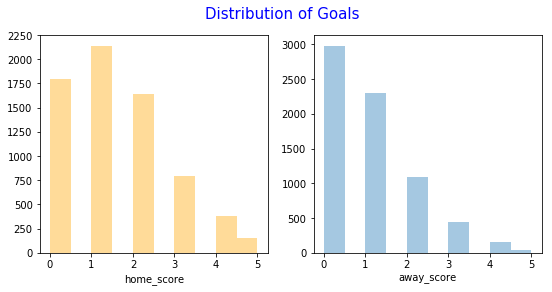

In [64]:
fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2, figsize=(9,4))
sns.distplot(out_f['home_score'], bins=10, ax =ax1, kde=False, color='orange')
sns.distplot(out_f['away_score'], bins=10, ax =ax2, kde=False)
fig.suptitle('Distribution of Goals', fontsize=15, color='b')
plt.show()

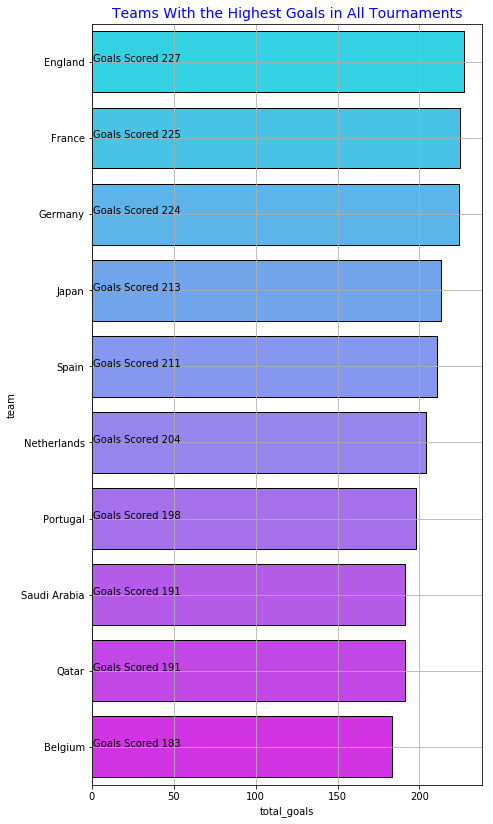

In [65]:
grp_h = out_f.groupby('home_team')['home_score'].sum().reset_index()
grp_h.columns = ['team', 'total_goals']
grp_a = out_f.groupby('away_team')['away_score'].sum().reset_index()
grp_a.columns = ['team', 'total_goals']

total_goals = pd.concat([grp_h,grp_a], axis=0)
total_goals.head(10)

total_goals = total_goals.groupby('team')['total_goals'].sum().reset_index()
total_goals = total_goals.sort_values('total_goals', ascending=False)
total_goals['total_goals'] = total_goals['total_goals'].astype(int)

plt.figure(figsize=(7,14))
ax = sns.barplot('total_goals', 'team', data=total_goals[:10], palette='cool',\
                linewidth=1, edgecolor="k"*10)

for i,j in enumerate('Goals Scored ' + total_goals['total_goals'][:10].astype(str)):  
  ax.text(.7,i,j,fontsize=10, color="k")
  
plt.title('Teams With the Highest Goals in All Tournaments', fontsize=14, color='b')
plt.grid(True)
plt.show()



In [66]:
out_f.describe()

,home_score,away_score,year,month,home_rank,away_rank
count,6909.000000,7020.000000,7066.000000,7066.000000,7066.000000,7066.000000
mean,1.463598,0.950285,2011.658506,7.259977,79.941410,82.385367
std,1.265443,1.062893,3.480224,3.142058,51.680358,53.051111
min,0.000000,0.000000,2006.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2009.000000,5.000000,36.000000,37.000000
50%,1.000000,1.000000,2012.000000,8.000000,76.000000,78.000000
75%,2.000000,1.000000,2015.000000,10.000000,118.000000,121.000000
max,5.000000,5.000000,2018.000000,12.000000,209.000000,209.000000


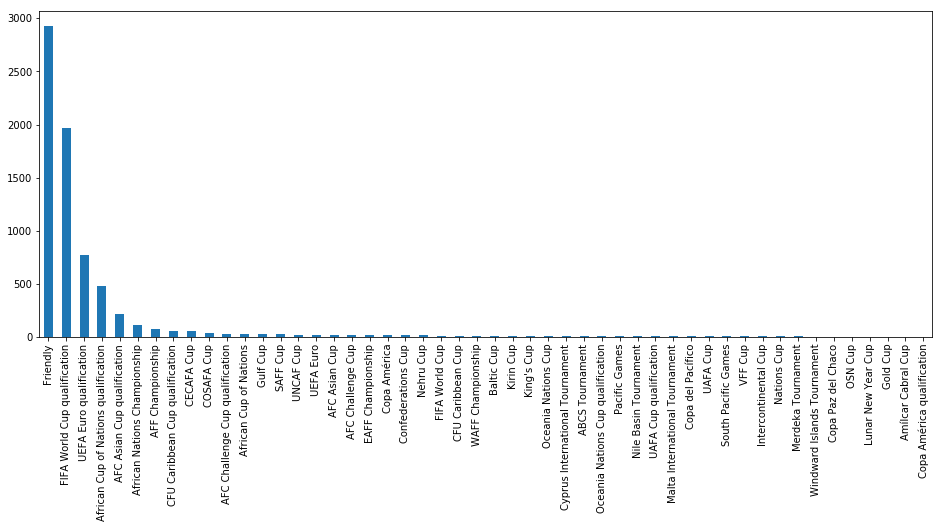

In [67]:
# out_f[out_f.home_score.isnull()]

out_f.tournament.value_counts().plot.bar(figsize=(16,6))

In [68]:
out_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7066 entries, 0 to 7696
Data columns (total 10 columns):
home_team     7066 non-null object
away_team     7066 non-null object
home_score    6909 non-null float64
away_score    7020 non-null float64
tournament    7066 non-null object
year          7066 non-null int64
month         7066 non-null int64
status        7066 non-null object
home_rank     7066 non-null float64
away_rank     7066 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 607.2+ KB


In [69]:
out_f.isnull().sum()

home_team       0
away_team       0
home_score    157
away_score     46
tournament      0
year            0
month           0
status          0
home_rank       0
away_rank       0
dtype: int64

In [70]:
out_f.dropna(inplace=True)
out_f.isnull().sum()

home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
year          0
month         0
status        0
home_rank     0
away_rank     0
dtype: int64

## 6. Exploratory Analysis

In [0]:
# Ploting the univariate summaries and recording our observations
#



## 7. Implementing the Solution

### Polynomial Regression

In [71]:
# Implementing the Solution
# 
out_f.columns


Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'year', 'month', 'status', 'home_rank', 'away_rank'],
      dtype='object')

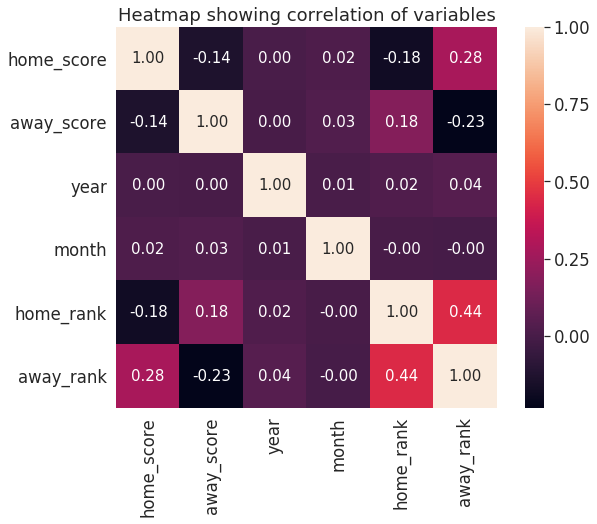

In [72]:
cols = ['home_score', 'away_score', 'year', 'month', 'home_rank', 'away_rank']
cm = np.corrcoef(out_f[cols].values.T)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.5)
hm = sns.heatmap(
    cm, cbar=True, annot=True, 
    square=True, fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.title('Heatmap showing correlation of variables')
plt.show()

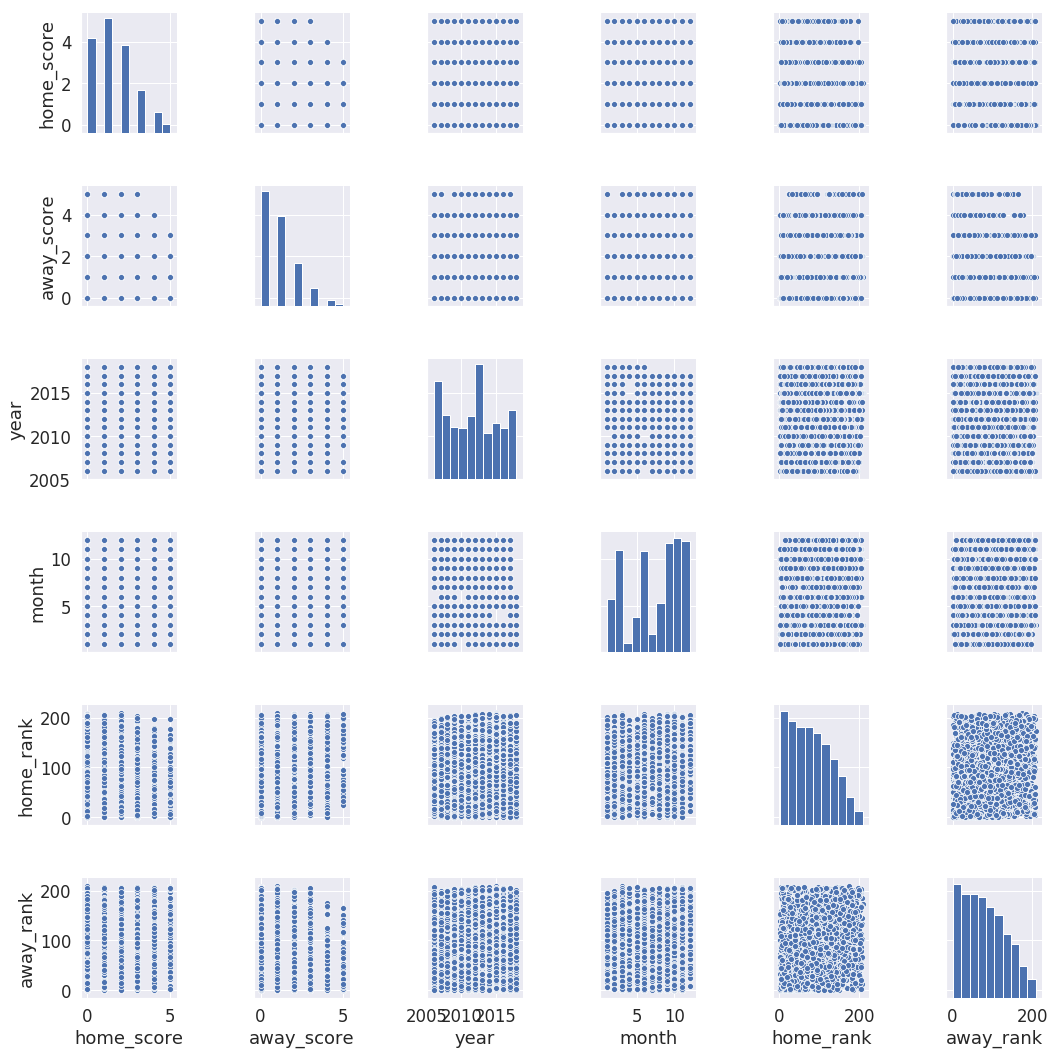

In [73]:
sns.pairplot(out_f[cols], height=2.5)
plt.tight_layout()
plt.show()

In [0]:
# mod = pd.get_dummies(out_f, drop_first=True)
# mod.head()

In [0]:
# using home_rank to determine goals scored by the home team
mod_df = out_f[['home_rank', 'home_score']]
mod_df.head()

feat = mod_df.home_rank.values.reshape(-1,1)
# feat=feat.reshape(-1,1)
feat_fit = np.arange(feat.min(), feat.max(), 1)[:, np.newaxis]
lebo = mod_df.home_score.values.reshape(-1,1)
# .reshape(-1,1)


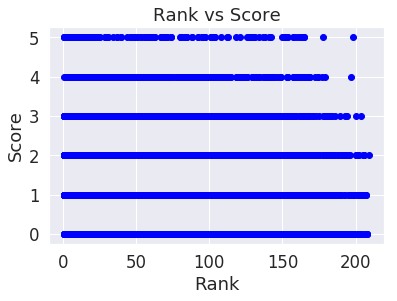

In [76]:
plt.scatter(feat, lebo, color='blue') 
plt.title('Rank vs Score')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()

In [77]:
feat_train, feat_test, lebo_train, lebo_test = train_test_split(feat,lebo, test_size=0.3, random_state=23)
lebo_train

array([[0.],
       [2.],
       [2.],
       ...,
       [2.],
       [0.],
       [0.]])

In [0]:
# creating quadratic and cubic polynomial features


quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
x_quad = quadratic.fit_transform(feat_train)
x_test = quadratic.fit_transform(feat_test)
x_cube = cubic.fit_transform(feat_train)

lin= LinearRegression()
quad = lin.fit(feat_train, lebo_train)
y_lin = lin.predict(feat_fit)
l_r2 = r2_score(lebo_test, lin.predict(feat_test))



In [79]:
linpol = lin.fit(x_quad, lebo_train)

# making predictions
y_quad_fit = linpol.predict(quadratic.fit_transform(feat_fit))

# calculating R squared
# quad_r2 = r2_score(lebo_test, linpol.predict(x_quad))
polpre = linpol.predict(x_quad)
quad_r2 = r2_score(lebo_train, polpre)

print('Quad RMSE: ', np.sqrt(mean_squared_error(lebo_train, polpre)), '\nQuad r_squared: ', quad_r2)

Quad RMSE:  1.2426702058088626 
Quad r_squared:  0.03131923903124467


In [80]:
resid = np.subtract(polpre, lebo_train)
pd.DataFrame(resid)

resid.mean()

-3.106036105529164e-17

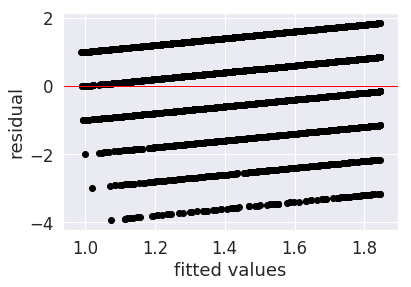

In [81]:
# plotting the residuals 

plt.scatter(polpre, resid, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= resid.mean(), color='red', linewidth=1)
plt.show()

In [82]:
import scipy as sp

test_result, p_val = sp.stats.bartlett(polpre.flatten(), resid.flatten())

degree_of_f = len(polpre)-1
prob = 1 - p_val

critical_value = sp.stats.chi2.ppf(prob, degree_of_f)
print(p_val)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



0.0
the variances are homogeneous!


In [83]:
lincub = lin.fit(x_cube, lebo_train)

# making predictions
y_cube_fit = lincub.predict(cubic.fit_transform(feat_fit))

# calculating R squared
# quad_r2 = r2_score(lebo_test, linpol.predict(x_quad))
cubpre = linpol.predict(x_cube)
cub_r2 = r2_score(lebo_train, cubpre)

print('Cubic RMSE: ', np.sqrt(mean_squared_error(lebo_train, cubpre)), '\nCubic r_squared: ', cub_r2)

Cubic RMSE:  1.2400191714435616 
Cubic r_squared:  0.03544787551614892


In [84]:
residuals = np.subtract(cubpre, lebo_train)
pd.DataFrame(residuals)

residuals.mean()

-3.986079668762427e-16

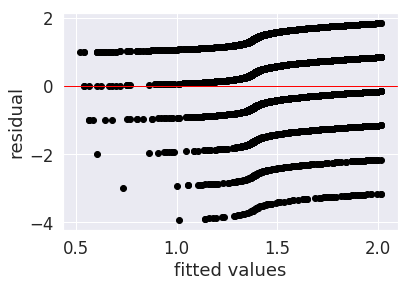

In [85]:
# plotting the residuals 

plt.scatter(cubpre, resid, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= resid.mean(), color='red', linewidth=1)
plt.show()

In [86]:
test_res, p_valu = sp.stats.bartlett(polpre.flatten(), resid.flatten())

degree_of_fre = len(cubpre)-1
proba = 1 - p_valu

critical_valu = sp.stats.chi2.ppf(proba, degree_of_fre)
print(p_valu)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_res > critical_valu):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



0.0
the variances are homogeneous!


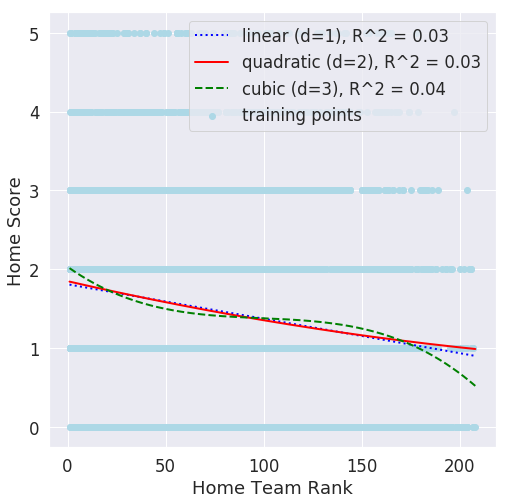

In [87]:
#  Plotting the results
plt.figure(figsize=(8, 8))
plt.scatter(feat_train, lebo_train, label='training points', color='lightblue')
plt.plot(
    feat_fit, y_lin,
    label=f'linear (d=1), R^2 = {l_r2:.2f}',
    color='blue', lw=2, linestyle=':'
)
plt.plot(
    feat_fit, y_quad_fit,
    label=f'quadratic (d=2), R^2 = {quad_r2:.2f}',
    color='red', lw=2, linestyle='-'
)
plt.plot(
    feat_fit, y_cube_fit,
    label=f'cubic (d=3), R^2 = {cub_r2:.2f}',
    color='green', lw=2, linestyle='--'
)

plt.xlabel('Home Team Rank')
plt.ylabel('Home Score')
plt.legend(loc='upper right')
plt.show()

### Logistic Regression

In [0]:
# # cross validation

# fold = KFold(n_splits=10)

# RMSES = [] # We will use this array to keep track of the RSME of each model
# count = 0 # This will just help 
# for train_index, test_index in fold.split(feat):
#   X_train, X_test = feat[train_index], feat[test_index]
#   y_train, y_test = lebo[train_index], lebo[test_index]
  
#   pol = PolynomialFeatures(degree=3)
#   f_pol = pol.fit_transform(X_train)
  
#   lin = LinearRegression()
#   lin.fit(f_pol,y_train)
  
#   y_pred = lin.predict(X_test)
  
#   rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#   RMSES.append(rmse_value)
  
#  # print(RMSES)

#   print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
#   count = count + 1
  

In [88]:
out_f.head()

,home_team,away_team,home_score,away_score,tournament,year,month,status,home_rank,away_rank
0,Qatar,Libya,2.0,0.0,Friendly,2006,1,Win,89.0,80.0
1,Egypt,Zimbabwe,2.0,0.0,Friendly,2006,1,Win,32.0,53.0
3,Tunisia,Libya,1.0,0.0,Friendly,2006,1,Win,28.0,80.0
4,Egypt,South Africa,1.0,2.0,Friendly,2006,1,Lose,32.0,49.0
5,Morocco,Zimbabwe,1.0,0.0,Friendly,2006,1,Win,35.0,53.0


In [0]:
log_df= out_f



In [0]:
log_feat = log_df.drop(['status', 'home_score', 'away_score'], 1)
log_lebo = log_df['status']



In [101]:

log_dum = pd.get_dummies(log_feat, drop_first=True)
log_dum.head()

,year,month,home_rank,away_rank,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,...,tournament_Baltic Cup,tournament_CECAFA Cup,tournament_CFU Caribbean Cup,tournament_CFU Caribbean Cup qualification,tournament_COSAFA Cup,tournament_Confederations Cup,tournament_Copa América,tournament_Copa América qualification,tournament_Copa Paz del Chaco,tournament_Copa del Pacífico,tournament_Cyprus International Tournament,tournament_EAFF Championship,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_Gold Cup,tournament_Gulf Cup,tournament_Intercontinental Cup,tournament_King's Cup,tournament_Kirin Cup,tournament_Lunar New Year Cup,tournament_Malta International Tournament,tournament_Merdeka Tournament,tournament_Nations Cup,tournament_Nehru Cup,tournament_Nile Basin Tournament,tournament_OSN Cup,tournament_Oceania Nations Cup,tournament_Oceania Nations Cup qualification,tournament_Pacific Games,tournament_SAFF Cup,tournament_South Pacific Games,tournament_UAFA Cup,tournament_UAFA Cup qualification,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UNCAF Cup,tournament_VFF Cup,tournament_WAFF Championship,tournament_Windward Islands Tournament
0,2006,1,89.0,80.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,1,32.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006,1,28.0,80.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,1,32.0,49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2006,1,35.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
lfeat_train, lfeat_test, llebo_train, llebo_test = train_test_split(log_dum,log_lebo, test_size=0.2, random_state=123)


In [103]:
# instantiating the model 
logreg = LogisticRegression()

# training the model on the training set
logreg.fit(lfeat_train, llebo_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
# making predicitons with model
log_pred = logreg.predict(lfeat_test)
log_pred

# win displayed from home team's perspective

array(['Win', 'Win', 'Win', ..., 'Win', 'Win', 'Lose'], dtype=object)

In [105]:
print('Logistic Model Accuracy: {:.4f}' .format(accuracy_score(llebo_test, log_pred)))

print('Confusion Matrix: \n{}' .format(confusion_matrix(llebo_test, log_pred)))

Logistic Model Accuracy: 0.5688
Confusion Matrix: 
[[  5 130 222]
 [  6 196 131]
 [  8  95 580]]


#### Hyperparameter Tuning

In [117]:
loreg = LogisticRegression()

penalty = ['l2']
dual = [True,False]
max_iter = [100,120,130]
C = [1.0,2.0,2.5]

# Creating hyperparameter options
hparameters = dict( penalty=penalty, dual=dual, max_iter=max_iter, C=C)

hparameters

{'C': [1.0, 2.0, 2.5],
 'dual': [True, False],
 'max_iter': [100, 120, 130],
 'penalty': ['l2']}

In [119]:
# creating grid search using 5-fold cross validation
hptun = GridSearchCV(estimator=loreg, param_grid=hparameters, cv=5, n_jobs=-1)
grid_res = hptun.fit(lfeat_train, llebo_train)

print('Best: %f using %s' % (grid_res.best_score_, grid_res.best_params_))


Best: 0.577960 using {'C': 1.0, 'dual': False, 'max_iter': 100, 'penalty': 'l2'}


#### Checking for Multicollinearity

In [0]:
# displaying the correlation between variables

correlations = log_df.corr()
correlations

In [0]:
# calculating the VIF score for each numerical variable
pd.DataFrame(np.linalg.inv(correlations.values), index=correlations.index, columns=correlations.columns)

In [0]:
# the variables are not correlated as the VIF score of each variable is close to 1
# therefore, we do not drop any variable

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?